In [7]:
import sys
assert sys.version_info >= (3, 5)
# Common imports
import numpy as np 
import time
# Pandas for overview
import pandas as pd
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rc('axes', labelsize=7) 
mpl.rc('xtick', labelsize=6) 
mpl.rc('ytick', labelsize=6) 
mpl.rc('figure', dpi=240) 
plt.close('all')
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
# Load the data
import pandas as pd
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
#Extract the outcomes and other variables  for use later on.
y = data['Outcome']
X = data.drop(columns=['Outcome'])

In [10]:
# Summary of the datasets
print(f'y:{y.value_counts()}') 
print(f'X:{X.describe()}')

print(data.info())

y:Outcome
0    500
1    268
Name: count, dtype: int64
X:       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000          

In [11]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Baseline model with Dummy Classifier Accuracy: 0.6428571428571429
Baseline model with Dummy Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



/opt/anaconda3/envs/umit/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/umit/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/umit/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


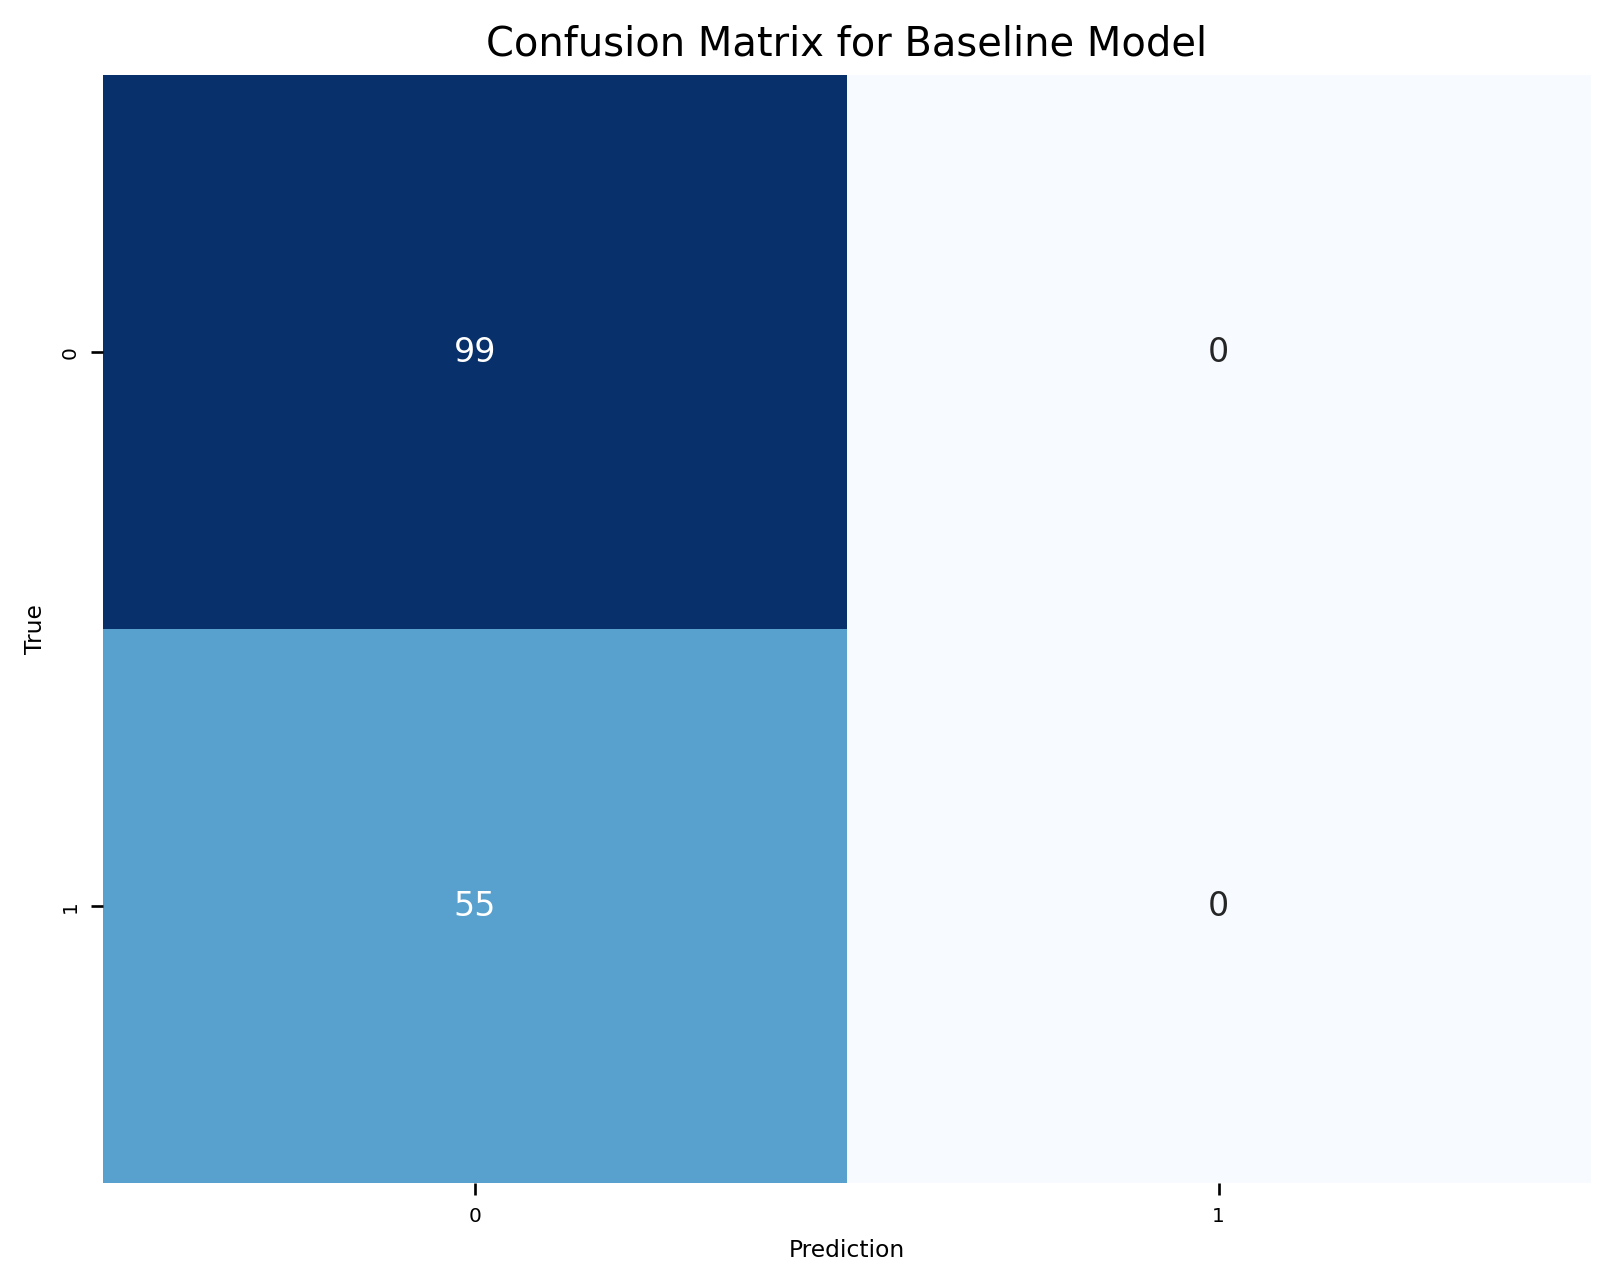

In [12]:
# Implement a Baseline model using Dummy Classifier
baseline_model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler()),  # Standardize features
    ('dummy', DummyClassifier(strategy='most_frequent'))  # Dummy Classifier with 'most_frequent' strategy
])

# Train the baseline model
baseline_model.fit(X_train, y_train)

# Predictions and evaluation for Dummy Classifier
y_pred_baseline = baseline_model.predict(X_test)
print("Baseline model with Dummy Classifier Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("Baseline model with Dummy Classifier Classification Report:\n", classification_report(y_test, y_pred_baseline))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_baseline)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["0", "1"], yticklabels=["0", "1"])

# Add labels and title
plt.title("Confusion Matrix for Baseline Model")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

Perceptron Accuracy: 0.7402597402597403
Perceptron Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



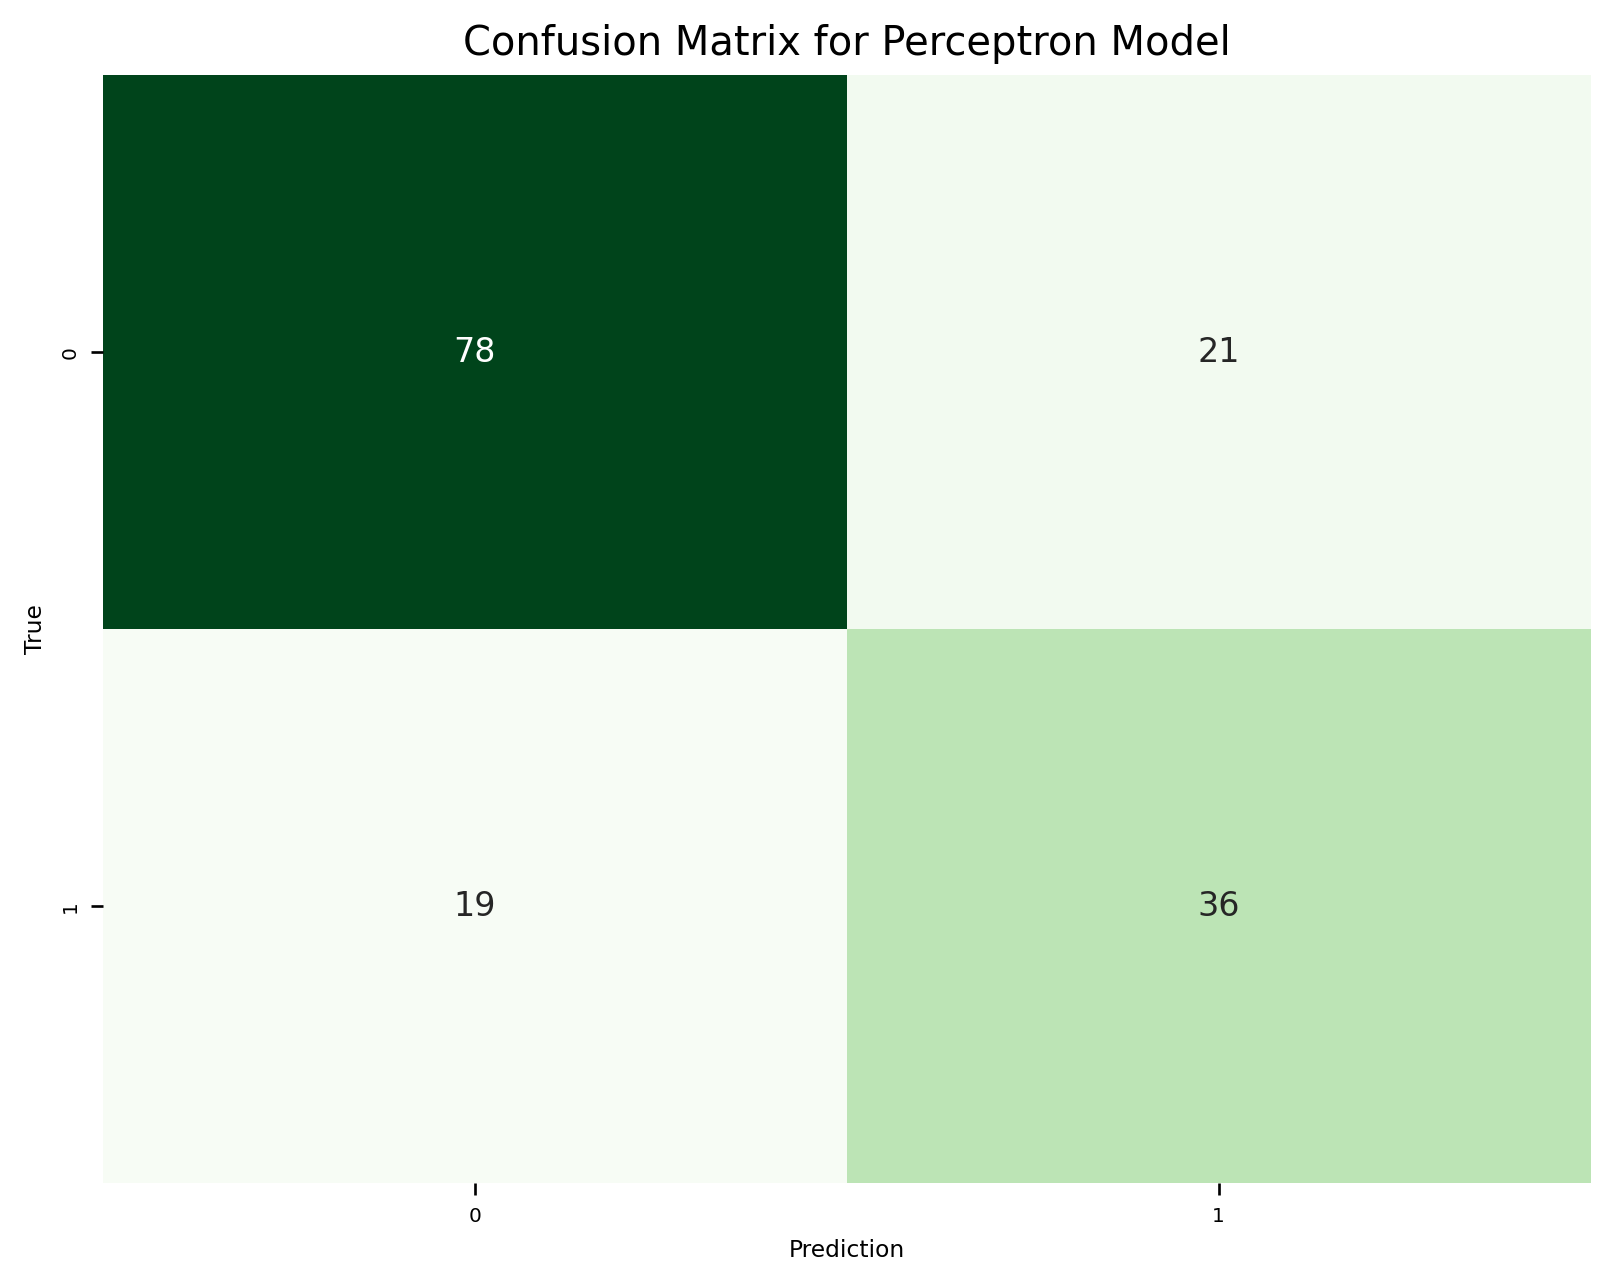

In [13]:
# Single Layer Perceptron model with imputation
perceptron_model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler()),  # Standardize features
    ('perceptron', Perceptron(class_weight='balanced', max_iter=1000, eta0=0.1, random_state=42))
])

# Train the Perceptron model
perceptron_model.fit(X_train, y_train)

# Predictions and evaluation for Perceptron
y_pred_perceptron = perceptron_model.predict(X_test)
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_perceptron))
print("Perceptron Classification Report:\n", classification_report(y_test, y_pred_perceptron))

# Create confusion matrix
cmp = confusion_matrix(y_test, y_pred_perceptron)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cmp, annot=True, fmt="d", cmap="Greens", cbar=False, xticklabels=["0", "1"], yticklabels=["0", "1"])

# Add labels and title
plt.title("Confusion Matrix for Perceptron Model")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

In [14]:
# Hyperparameter Tuning (Learning rate: eta0, Regularization: alpha)
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Perceptron
param_grid = {
    'perceptron__eta0': [0.001, 0.01, 0.1, 1],
    'perceptron__alpha': [0.0001, 0.001, 0.01]
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(perceptron_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
y_pred_best = grid_search.predict(X_test)
print("Best Perceptron Accuracy:", accuracy_score(y_test, y_pred_best))

# Evaluate the tuned model
y_pred_best = grid_search.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Best parameters found:  {'perceptron__alpha': 0.0001, 'perceptron__eta0': 0.1}
Best Perceptron Accuracy: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

Confusion Matrix:
 [[78 21]
 [19 36]]


MLP Accuracy: 0.7207792207792207
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79        99
           1       0.62      0.58      0.60        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



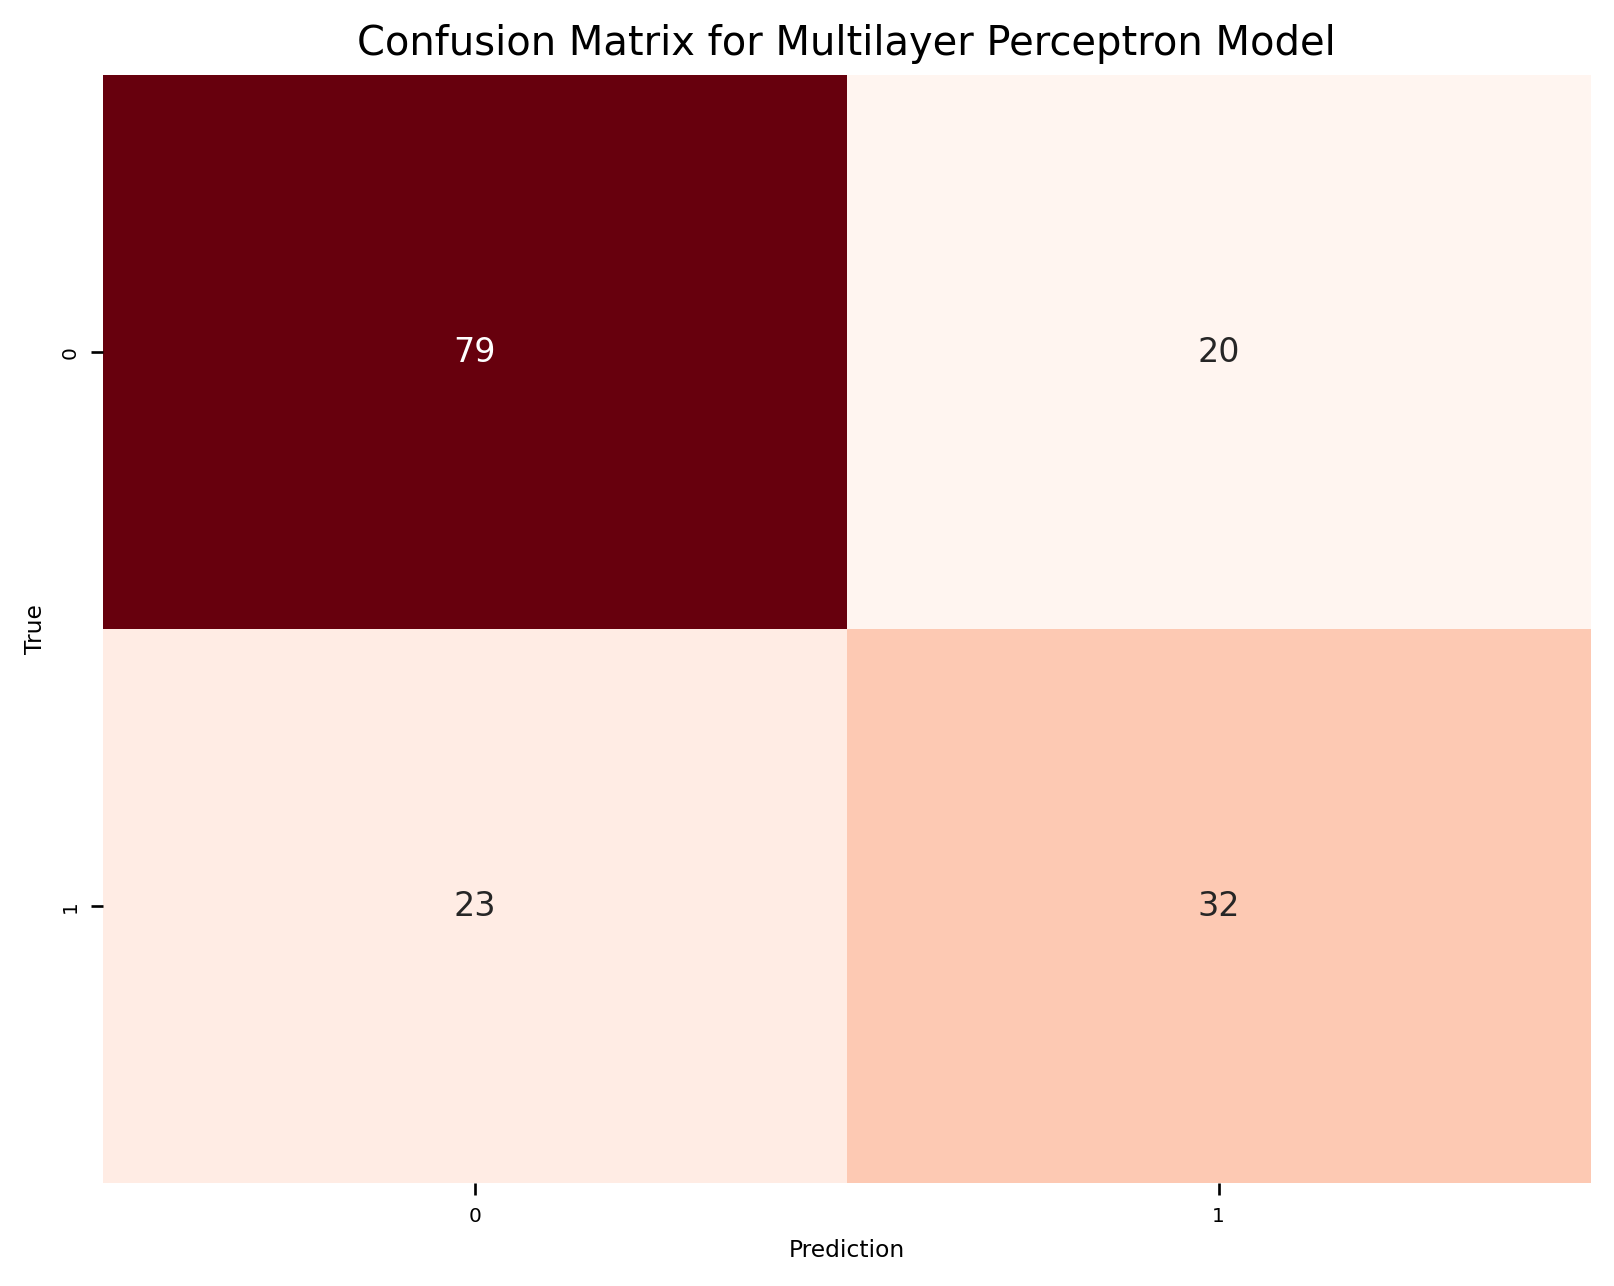

In [15]:
# Implementing Multilayer Perceptron (MLP)
# Define the MLP model
mlp_model = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
])

# Train the MLP model
mlp_model.fit(X_train, y_train)

# Make predictions with the MLP model
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the MLP model
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))
 
# Create confusion matrix
cmlp = confusion_matrix(y_test, y_pred_mlp)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cmlp, annot=True, fmt="d", cmap="Reds", cbar=False, xticklabels=["0", "1"], yticklabels=["0", "1"])

# Add labels and title
plt.title("Confusion Matrix for Multilayer Perceptron Model")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()